In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import os 
from tqdm import tqdm
import pandas as pd
# import uncertainties.unumpy as unp
from scipy.optimize import curve_fit
from statistics import mode
# import ipyparams # only in notebook, not in jupyter lab

In [2]:
save_plot = True # False

# currentNotebook = ipyparams.notebook_name[:len(ipyparams.notebook_name)-6] # get name of currect notebook
# assert currentNotebook != '', "no notebook name, run cell again"

currentNotebook = "total_defl_combined_moliere"

plot_dir = 'plots/{}/'.format(currentNotebook)
os.system('mkdir -p {}'.format(plot_dir))

df_dir = 'data/{}/'.format(currentNotebook)
os.system('mkdir -p {}'.format(df_dir))

0

# E_i = 1 PeV

In [23]:
df_dict_unsorted = {}
path = 'data/total_defl_combined_moliere_1PeV/'
for i, hdf in enumerate(sorted(os.listdir(path))):
    df = pd.read_hdf(path + hdf, key='seed_3')
    df_dict_unsorted['df_%02d' %(i+1)] = df

    
E_f_unsorted = [mode(df_dict_unsorted[df].E_f) for df in df_dict_unsorted]

df_dict = {}
for df in [x for _, x in sorted(zip(E_f_unsorted, df_dict_unsorted.keys()))]:
    df_dict[df] = df_dict_unsorted[df]
print(df_dict.keys())
E_f = sorted(E_f_unsorted)
E_f

dict_keys(['df_10', 'df_09', 'df_04', 'df_08', 'df_03', 'df_07', 'df_02', 'df_06', 'df_01', 'df_05'])


[10.0,
 50.0,
 100.0,
 500.0,
 1000.0,
 5000.0,
 10000.0,
 50000.0,
 100000.0,
 500000.0]

In [24]:
df_dict['df_10']

,E_i,E_f,distances,deflection,x_dir_i,y_dir_i,z_dir_i,x_i,y_i,z_i,x_f,y_f,z_f
0,1000000.0,10.0,18852.879724,0.896807,0.0,0.0,1.0,0.0,0.0,0.0,290.455503,269.432853,1.885287e+06
1,1000000.0,10.0,13423.779349,1.569616,0.0,0.0,1.0,0.0,0.0,0.0,268.498060,21.307289,1.342376e+06
2,1000000.0,10.0,23550.824371,1.257419,0.0,0.0,1.0,0.0,0.0,0.0,-226.877047,479.595377,2.355080e+06
3,1000000.0,10.0,21832.884445,1.515534,0.0,0.0,1.0,0.0,0.0,0.0,-350.451140,-994.230364,2.183279e+06
4,1000000.0,10.0,16179.708714,1.609235,0.0,0.0,1.0,0.0,0.0,0.0,427.836255,-40.796922,1.617969e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54995,1000000.0,10.0,16088.731153,0.366483,0.0,0.0,1.0,0.0,0.0,0.0,-214.993102,647.360400,1.608872e+06
54996,1000000.0,10.0,17185.026032,1.070624,0.0,0.0,1.0,0.0,0.0,0.0,449.395969,856.964648,1.718499e+06
54997,1000000.0,10.0,18733.100881,1.341951,0.0,0.0,1.0,0.0,0.0,0.0,-70.994198,761.953280,1.873308e+06
54998,1000000.0,10.0,21686.419616,0.591249,0.0,0.0,1.0,0.0,0.0,0.0,-55.658897,761.579041,2.168640e+06


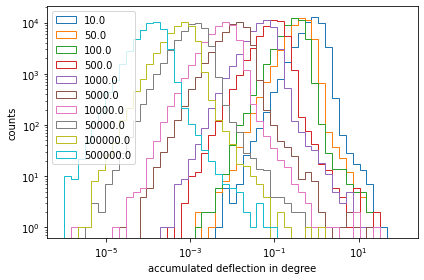

In [4]:
bins = np.logspace(-6, 2, 50)
for i,d in enumerate(df_dict):
    df = df_dict[d]
    plt.hist(df.deflection, bins=bins, histtype='step', label=E_f[i])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('accumulated deflection in degree')
plt.ylabel('counts')
plt.legend(loc='upper left')
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '1PeV_deflections.pdf')

# E_i = 100 TeV

In [25]:
df_dict_unsorted = {}
path = 'data/total_defl_combined_moliere_100TeV/'
for i, hdf in enumerate(sorted(os.listdir(path))):
    df = pd.read_hdf(path + hdf, key='seed_3')
    df_dict_unsorted['df_%02d' %(i+1)] = df

    
E_f_unsorted = [mode(df_dict_unsorted[df].E_f) for df in df_dict_unsorted]

df_dict_100 = {}
for df in [x for _, x in sorted(zip(E_f_unsorted, df_dict_unsorted.keys()))]:
    df_dict_100[df] = df_dict_unsorted[df]
print(df_dict_100.keys())
E_f_100 = sorted(E_f_unsorted)
E_f_100

dict_keys(['df_08', 'df_07', 'df_03', 'df_06', 'df_02', 'df_05', 'df_01', 'df_04'])


[10.0, 50.0, 100.0, 500.0, 1000.0, 5000.0, 10000.0, 50000.0]

# E_i = 10 TeV

In [26]:
df_dict_unsorted = {}
for i, hdf in enumerate(sorted(os.listdir(path))):
    df = pd.read_hdf(path + hdf, key='seed_3')
    df_dict_unsorted['df_%02d' %(i+1)] = df

    
E_f_unsorted = [mode(df_dict_unsorted[df].E_f) for df in df_dict_unsorted]

df_dict_10 = {}
for df in [x for _, x in sorted(zip(E_f_unsorted, df_dict_unsorted.keys()))]:
    df_dict_10[df] = df_dict_unsorted[df]
print(df_dict_10.keys())
E_f_10 = sorted(E_f_unsorted)
E_f_10

dict_keys(['df_08', 'df_07', 'df_03', 'df_06', 'df_02', 'df_05', 'df_01', 'df_04'])


[10.0, 50.0, 100.0, 500.0, 1000.0, 5000.0, 10000.0, 50000.0]

# E_i = 10 PeV

In [27]:
df_dict_unsorted = {}
path = 'data/total_defl_combined_moliere_10PeV/'
for i, hdf in enumerate(sorted(os.listdir(path))):
    df = pd.read_hdf(path + hdf, key='seed_3')
    df_dict_unsorted['df_%02d' %(i+1)] = df

    
E_f_unsorted = [mode(df_dict_unsorted[df].E_f) for df in df_dict_unsorted]

df_dict_10P = {}
for df in [x for _, x in sorted(zip(E_f_unsorted, df_dict_unsorted.keys()))]:
    df_dict_10P[df] = df_dict_unsorted[df]
print(df_dict_10P.keys())
E_f_10P = sorted(E_f_unsorted)
E_f_10P

dict_keys(['df_10', 'df_09', 'df_04', 'df_08', 'df_03', 'df_07', 'df_02', 'df_06', 'df_01', 'df_05', 'df_11', 'df_12'])


[10.0,
 50.0,
 100.0,
 500.0,
 1000.0,
 5000.0,
 10000.0,
 50000.0,
 100000.0,
 500000.0,
 1000000.0,
 5000000.0]

# Comparison E_i: 10 TeV / 100 Tev / 1 PeV / 10 PeV

# Use median and central intervals

In [28]:
# E_i = 10 PeV
deflection_median_10P = []
deflection_median_lower_10P = [] 
deflection_median_upper_10P = []
for d in df_dict_10P:
    df = df_dict_10P[d]
    deflection_median_10P.append(np.median(df.deflection))
    deflection_median_lower_10P.append(np.median(df.deflection) - np.quantile(df.deflection, 0.025)) # 95% content
    deflection_median_upper_10P.append(np.quantile(df.deflection, 0.975) - np.median(df.deflection))

# E_i = 1 PeV    
deflection_median_1P = []
deflection_median_lower_1P = [] 
deflection_median_upper_1P = []
for d in df_dict:
    df = df_dict[d]
    deflection_median_1P.append(np.median(df.deflection))
    deflection_median_lower_1P.append(np.median(df.deflection) - np.quantile(df.deflection, 0.025)) # 95% content
    deflection_median_upper_1P.append(np.quantile(df.deflection, 0.975) - np.median(df.deflection))
    
# E_i = 100 TabNine::eV
deflection_median_100 = []
deflection_median_lower_100 = [] 
deflection_median_upper_100 = []
for d in df_dict_100:
    df = df_dict_100[d]
    deflection_median_100.append(np.median(df.deflection))
    deflection_median_lower_100.append(np.median(df.deflection) - np.quantile(df.deflection, 0.025)) # 95% content
    deflection_median_upper_100.append(np.quantile(df.deflection, 0.975) - np.median(df.deflection))

# E_i = 10 TeV    
deflection_median_10 = []
deflection_median_lower_10 = [] 
deflection_median_upper_10 = []
for d in df_dict_10:
    df = df_dict_10[d]
    deflection_median_10.append(np.median(df.deflection))
    deflection_median_lower_10.append(np.median(df.deflection) - np.quantile(df.deflection, 0.025)) # 95% content
    deflection_median_upper_10.append(np.quantile(df.deflection, 0.975) - np.median(df.deflection))

poly params:  [ 0.02346311 -0.30322558  0.34082957 -0.17725468] , errors:  [0.00093144 0.0108566  0.03803043 0.03872929]
efit params:  [-8.64047463  0.07170535  9.35811576] , errors:  [4.8723527  0.031343   5.01053902]
efit params:  [-2.68492843  0.16901147  3.17153077] , errors:  [0.67847323 0.02637416 0.75757004]
efit params:  [-1.34051814  0.26049888  1.68279911] , errors:  [0.29109831 0.0310161  0.34946552]
efit params:  [-1.34051814  0.26049888  1.68279911] , errors:  [0.29109831 0.0310161  0.34946552]


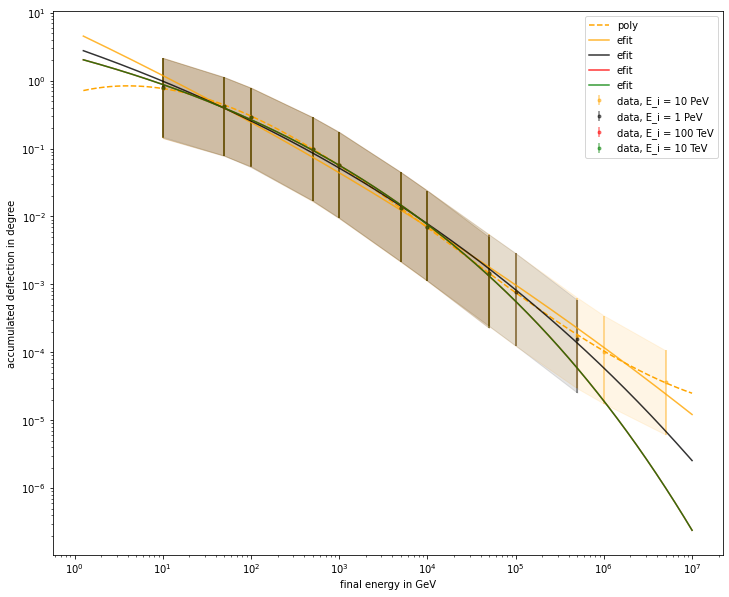

In [29]:
### fit deflection medians
x = np.logspace(0.1, 7, 1000)
plt.figure(figsize=(12, 10))


# polynom fit
def poly(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# E_i = 10 PeV
params, cov = curve_fit(poly, np.log10(E_f_10P), np.log10(deflection_median_10P))
errors = np.sqrt(np.diag(cov))
print('poly params: ', params, ', errors: ', errors)
plt.plot(x, np.power(10, poly(np.log10(x), *params)), '--', color='orange', alpha=1, label='poly')


# e-fit 
def efit(x, a, b, c):
    return a * np.exp(b * x) + c

# E_i = 10 PeV
params, cov = curve_fit(efit, np.log10(E_f_10P), np.log10(deflection_median_10P))
errors = np.sqrt(np.diag(cov))
print('efit params: ', params, ', errors: ', errors) 
plt.plot(x, np.power(10, efit(np.log10(x), *params)), color='orange', alpha=0.8, label='efit')

plt.errorbar(E_f_10P, deflection_median_10P, yerr=(deflection_median_lower_10P, deflection_median_upper_10P), fmt='.', color='orange', alpha=0.5, label='data, E_i = 10 PeV')
plt.fill_between(E_f_10P, np.array(deflection_median_10P)-np.array(deflection_median_lower_10P), np.array(deflection_median_10P) + np.array(deflection_median_upper_10P), alpha=0.1, color='orange')


# E_i = 1 PeV
params, cov = curve_fit(efit, np.log10(E_f), np.log10(deflection_median_1P))
errors = np.sqrt(np.diag(cov))
print('efit params: ', params, ', errors: ', errors) 
plt.plot(x, np.power(10, efit(np.log10(x), *params)), color='black', alpha=0.8, label='efit')

plt.errorbar(E_f, deflection_median_1P, yerr=(deflection_median_lower_1P, deflection_median_upper_1P), fmt='.', color='black', alpha=0.5, label='data, E_i = 1 PeV')
plt.fill_between(E_f, np.array(deflection_median_1P)-np.array(deflection_median_lower_1P), np.array(deflection_median_1P) + np.array(deflection_median_upper_1P), alpha=0.1, color='black')


# E_i = 100 TeV
params, cov = curve_fit(efit, np.log10(E_f_100), np.log10(deflection_median_100))
errors = np.sqrt(np.diag(cov))
print('efit params: ', params, ', errors: ', errors) 
plt.plot(x, np.power(10, efit(np.log10(x), *params)), color='red', alpha=0.8, label='efit')

plt.errorbar(E_f_100, deflection_median_100, yerr=(deflection_median_lower_100, deflection_median_upper_100), fmt='.', color='red', alpha=0.5, label='data, E_i = 100 TeV')
plt.fill_between(E_f_100, np.array(deflection_median_100)-np.array(deflection_median_lower_100), np.array(deflection_median_100) + np.array(deflection_median_upper_100), alpha=0.1, color='red')


# E_i = 10 TeV
params, cov = curve_fit(efit, np.log10(E_f_10), np.log10(deflection_median_10))
errors = np.sqrt(np.diag(cov))
print('efit params: ', params, ', errors: ', errors) 
plt.plot(x, np.power(10, efit(np.log10(x), *params)), color='green', alpha=0.8, label='efit')

plt.errorbar(E_f_10, deflection_median_10, yerr=(deflection_median_lower_10, deflection_median_upper_10), fmt='.', color='green', alpha=0.5, label='data, E_i = 10 TeV')
plt.fill_between(E_f_10, np.array(deflection_median_10)-np.array(deflection_median_lower_10), np.array(deflection_median_10) + np.array(deflection_median_upper_10), alpha=0.1, color='green')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('final energy in GeV')
plt.ylabel('accumulated deflection in degree')
plt.legend()

poly params:  [ 0.02346311 -0.30322558  0.34082957 -0.17725468] , errors:  [0.00093144 0.0108566  0.03803043 0.03872929]
efit params:  [-8.64047463  0.07170535  9.35811576] , errors:  [4.8723527  0.031343   5.01053902]
efit params:  [-2.68492843  0.16901147  3.17153077] , errors:  [0.67847323 0.02637416 0.75757004]
efit params:  [-1.34051814  0.26049888  1.68279911] , errors:  [0.29109831 0.0310161  0.34946552]
efit params:  [-1.34051814  0.26049888  1.68279911] , errors:  [0.29109831 0.0310161  0.34946552]


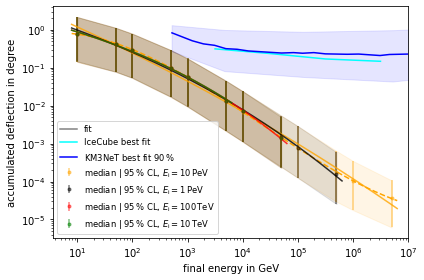

In [30]:
### fit deflection medians
x = np.logspace(0.1, 7, 1000)
# plt.figure(figsize=(12, 10))


# polynom fit
def poly(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# E_i = 10 PeV
params, cov = curve_fit(poly, np.log10(E_f_10P), np.log10(deflection_median_10P))
errors = np.sqrt(np.diag(cov))
print('poly params: ', params, ', errors: ', errors)
x = np.logspace(0.9, 6.8, 1000)
plt.plot(x, np.power(10, poly(np.log10(x), *params)), '--', color='orange', alpha=1) # , label='poly')


# e-fit 
def efit(x, a, b, c):
    return a * np.exp(b * x) + c

# E_i = 10 PeV
params, cov = curve_fit(efit, np.log10(E_f_10P), np.log10(deflection_median_10P))
errors = np.sqrt(np.diag(cov))
print('efit params: ', params, ', errors: ', errors) 
plt.plot(x, np.power(10, efit(np.log10(x), *params)), color='orange', alpha=0.8) # , label='efit')

plt.errorbar(E_f_10P, deflection_median_10P, yerr=(deflection_median_lower_10P, deflection_median_upper_10P), fmt='.', color='orange', alpha=0.5, label=r'median | $95\,$% CL, $E_\mathrm{i} = 10\,$PeV')
plt.fill_between(E_f_10P, np.array(deflection_median_10P)-np.array(deflection_median_lower_10P), np.array(deflection_median_10P) + np.array(deflection_median_upper_10P), alpha=0.1, color='orange')


# E_i = 1 PeV
params, cov = curve_fit(efit, np.log10(E_f), np.log10(deflection_median_1P))
errors = np.sqrt(np.diag(cov))
print('efit params: ', params, ', errors: ', errors) 
x = np.logspace(0.9, 5.8, 1000)
plt.plot(x, np.power(10, efit(np.log10(x), *params)), color='black', alpha=0.8) # , label='efit')

plt.errorbar(E_f, deflection_median_1P, yerr=(deflection_median_lower_1P, deflection_median_upper_1P), fmt='.', color='black', alpha=0.5, label=r'median | $95\,$% CL, $E_\mathrm{i} = 1\,$PeV')
plt.fill_between(E_f, np.array(deflection_median_1P)-np.array(deflection_median_lower_1P), np.array(deflection_median_1P) + np.array(deflection_median_upper_1P), alpha=0.1, color='black')


# E_i = 100 TeV
params, cov = curve_fit(efit, np.log10(E_f_100), np.log10(deflection_median_100))
errors = np.sqrt(np.diag(cov))
print('efit params: ', params, ', errors: ', errors) 
x = np.logspace(0.9, 4.8, 1000)
plt.plot(x, np.power(10, efit(np.log10(x), *params)), color='red', alpha=0.8) #, label='efit')

plt.errorbar(E_f_100, deflection_median_100, yerr=(deflection_median_lower_100, deflection_median_upper_100), fmt='.', color='red', alpha=0.5, label=r'median | $95\,$% CL, $E_\mathrm{i} = 100\,$TeV')
plt.fill_between(E_f_100, np.array(deflection_median_100)-np.array(deflection_median_lower_100), np.array(deflection_median_100) + np.array(deflection_median_upper_100), alpha=0.1, color='red')


# E_i = 10 TeV
params, cov = curve_fit(efit, np.log10(E_f_10), np.log10(deflection_median_10))
errors = np.sqrt(np.diag(cov))
print('efit params: ', params, ', errors: ', errors) 
x = np.logspace(0.9, 3.8, 1000)
plt.plot(x, np.power(10, efit(np.log10(x), *params)), color='green', alpha=0.8) #, label='efit')

plt.errorbar(E_f_10, deflection_median_10, yerr=(deflection_median_lower_10, deflection_median_upper_10), fmt='.', color='green', alpha=0.5, label=r'median | $95\,$% CL, $E_\mathrm{i} = 10\,$TeV')
plt.fill_between(E_f_10, np.array(deflection_median_10)-np.array(deflection_median_lower_10), np.array(deflection_median_10) + np.array(deflection_median_upper_10), alpha=0.1, color='green')

plt.plot(0, 0, '-', color='grey', label='fit')

# IceCube 2021
IceCube_median_error_E = [3154.6222956675642, 31393.67119012529, 318535.5398366218, 3139367.1190125225]
IceCube_median_error_theta = [0.3132923103706559, 0.23583164894478967, 0.1696125188412025, 0.147416292664677]
plt.plot(IceCube_median_error_E, IceCube_median_error_theta, '-', color='cyan', label='IceCube best fit')

# KM3NeT 2016
KM3NeT_median_error_E = [522.4356285756223, 1216.8748116390357, 1943.231716329505, 3103.1536417971624, 
                         4955.437091562044, 7913.355122889535, 12636.864951346342, 50689.50296608002, 
                         83427.93140908847, 121687.48116390369, 194323.17163295028, 315036.3417558579, 
                         779476.9527719838, 1263686.4951346342, 3079814.718585156, 4560541.30436924, 
                         9850144.98486653, 20642110.490612086, 32469485.711770043, 48811773.81527156]
KM3NeT_median_error_theta = [0.827576632070297, 0.5123763092955053, 0.42403066039938264, 0.38818709714958904, 
                             0.31722679466012654, 0.305443935560202, 0.2761187447596839, 0.24338923735390608, 
                             0.24960901930441665, 0.2403377094590886, 0.24960901930441665, 0.2314107669226327, 
                             0.22564445080444856, 0.22850942083969703, 0.20919338394904638, 0.22281540074690914,
                             0.22850942083969703, 0.23434895091387908, 0.22850942083969703, 0.24647950999050272]
plt.plot(KM3NeT_median_error_E, KM3NeT_median_error_theta, '-', color='blue', label='KM3NeT best fit $90\,$%')
x = [514.606668672977, 4665.0087107025565,  123538.77161286505, 5224356.285756218, 1e7]
y_low = [0.27265686591460175, 0.08120617245807966, 0.05703801243761694, 0.04321320106658356, 0.0478]
y_up = [1.3199210201931573, 0.9874623548354361, 0.8814658257473126, 0.9750819022171437, 1.01]
plt.fill_between(x, y_low, y_up, alpha=0.1, color='blue')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('final energy in GeV')
plt.ylabel('accumulated deflection in degree')
plt.legend(fontsize='small', loc='lower left', )
plt.xlim(right=1e7)
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'fit_median_defl.pdf')

efit params:  [-2.68492843  0.16901147  3.17153077] , errors:  [0.67847323 0.02637416 0.75757004]


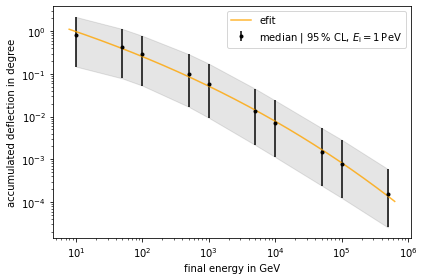

In [31]:
### fit deflection medians
x = np.logspace(0.1, 7, 1000)

# E_i = 1 PeV
params, cov = curve_fit(efit, np.log10(E_f), np.log10(deflection_median_1P))
errors = np.sqrt(np.diag(cov))
print('efit params: ', params, ', errors: ', errors) 
x = np.logspace(0.9, 5.8, 1000)
plt.plot(x, np.power(10, efit(np.log10(x), *params)), color='orange', alpha=0.8, label='efit')

plt.errorbar(E_f, deflection_median_1P, yerr=(deflection_median_lower_1P, deflection_median_upper_1P), fmt='.', color='black', alpha=1, label=r'median | $95\,$% CL, $E_\mathrm{i} = 1\,$PeV')
plt.fill_between(E_f, np.array(deflection_median_1P)-np.array(deflection_median_lower_1P), np.array(deflection_median_1P) + np.array(deflection_median_upper_1P), alpha=0.1, color='black')



plt.xscale('log')
plt.yscale('log')
plt.xlabel('final energy in GeV')
plt.ylabel('accumulated deflection in degree')
plt.legend()
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'fit_median_defl_1PeV.pdf')

# Check hard cut of E_min

In [32]:
df_dict.keys()

dict_keys(['df_10', 'df_09', 'df_04', 'df_08', 'df_03', 'df_07', 'df_02', 'df_06', 'df_01', 'df_05'])

0.7946706262780444882 0.79384623497052230216
0.6460422728445612546 0.64284515355098716994
1.3623425033436640252 1.3120653092727540194


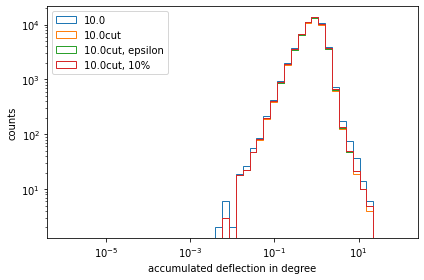

In [33]:
bins = np.logspace(-6, 2, 50)
i = 0
df = df_dict['df_10']
plt.hist(df.deflection, bins=bins, histtype='step', label=E_f[i])
plt.hist(df.deflection[df.E_f == E_f[i]], bins=bins, histtype='step', label=str(E_f[i]) + 'cut')

epsilon = 0.5 # 500 MeV
ma = 1.1
mi = 0.9
plt.hist(df.deflection[(df.E_f < E_f[i] + epsilon) & (df.E_f > E_f[i] - epsilon)], bins=bins, histtype='step', label=str(E_f[i]) + 'cut, epsilon')
plt.hist(df.deflection[(df.E_f < E_f[i] * ma) & (df.E_f > E_f[i] * mi)], bins=bins, histtype='step', label=str(E_f[i]) + 'cut, 10%')



print(np.median(df.deflection), np.median(df.deflection[df.E_f == E_f[i]]))
print(np.median(df.deflection) - np.quantile(df.deflection, 0.025), np.median(df.deflection[df.E_f == E_f[i]]) - np.quantile(df.deflection[df.E_f == E_f[i]], 0.025))
print(np.quantile(df.deflection, 0.975) - np.median(df.deflection),  np.quantile(df.deflection[df.E_f == E_f[i]], 0.975) - np.median(df.deflection))

plt.xscale('log')
plt.yscale('log')
plt.xlabel('accumulated deflection in degree')
plt.ylabel('counts')
plt.legend(loc='upper left')
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '1PeV_deflections_hard_cut_E_min.pdf')

0.09918736407349555654 0.103910409359896535215
0.08220181049402860161 0.084843183584861209906
0.19097525531601870476 0.17003882362144898303


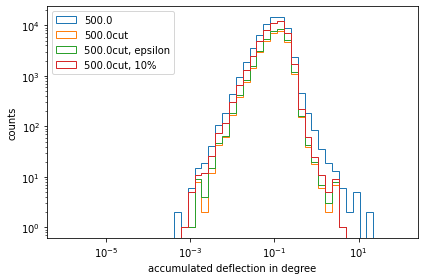

In [34]:
bins = np.logspace(-6, 2, 50)
i = 3
df = df_dict['df_08']
plt.hist(df.deflection, bins=bins, histtype='step', label=E_f[i])
plt.hist(df.deflection[df.E_f == E_f[i]], bins=bins, histtype='step', label=str(E_f[i]) + 'cut')

epsilon = 0.5 # 500 MeV
ma = 1.1
mi = 0.9
plt.hist(df.deflection[(df.E_f < E_f[i] + epsilon) & (df.E_f > E_f[i] - epsilon)], bins=bins, histtype='step', label=str(E_f[i]) + 'cut, epsilon')
plt.hist(df.deflection[(df.E_f < E_f[i] * ma) & (df.E_f > E_f[i] * mi)], bins=bins, histtype='step', label=str(E_f[i]) + 'cut, 10%')



print(np.median(df.deflection), np.median(df.deflection[df.E_f == E_f[i]]))
print(np.median(df.deflection) - np.quantile(df.deflection, 0.025), np.median(df.deflection[df.E_f == E_f[i]]) - np.quantile(df.deflection[df.E_f == E_f[i]], 0.025))
print(np.quantile(df.deflection, 0.975) - np.median(df.deflection),  np.quantile(df.deflection[df.E_f == E_f[i]], 0.975) - np.median(df.deflection))

plt.xscale('log')
plt.yscale('log')
plt.xlabel('accumulated deflection in degree')
plt.ylabel('counts')
plt.legend(loc='upper left')
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '1PeV_deflections_hard_cut_E_min.pdf')

0.00015852279944747145843 0.00015931059352187841795
0.00013309524721720478853 0.00010620652039338205047
0.00043280892668210436727 0.00025856974054908403636


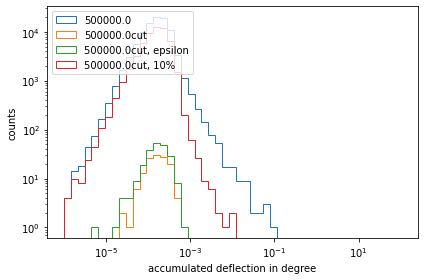

In [35]:
bins = np.logspace(-6, 2, 50)
i = 9
df = df_dict['df_05']
plt.hist(df.deflection, bins=bins, histtype='step', label=E_f[i])
plt.hist(df.deflection[df.E_f == E_f[i]], bins=bins, histtype='step', label=str(E_f[i]) + 'cut')

epsilon = 0.5 # 500 MeV
ma = 1.1
mi = 0.9
plt.hist(df.deflection[(df.E_f < E_f[i] + epsilon) & (df.E_f > E_f[i] - epsilon)], bins=bins, histtype='step', label=str(E_f[i]) + 'cut, epsilon')
plt.hist(df.deflection[(df.E_f < E_f[i] * ma) & (df.E_f > E_f[i] * mi)], bins=bins, histtype='step', label=str(E_f[i]) + 'cut, 10%')



print(np.median(df.deflection), np.median(df.deflection[df.E_f == E_f[i]]))
print(np.median(df.deflection) - np.quantile(df.deflection, 0.025), np.median(df.deflection[df.E_f == E_f[i]]) - np.quantile(df.deflection[df.E_f == E_f[i]], 0.025))
print(np.quantile(df.deflection, 0.975) - np.median(df.deflection),  np.quantile(df.deflection[df.E_f == E_f[i]], 0.975) - np.median(df.deflection))


plt.xscale('log')
plt.yscale('log')
plt.xlabel('accumulated deflection in degree')
plt.ylabel('counts')
plt.legend(loc='upper left')
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '1PeV_deflections_hard_cut_E_min.pdf')

0.00077370195431583541277 0.0008771501081397251885
0.0006481528783533058604 0.0007347474801742256058
0.0021144196179785110438 0.0013984643188739047428


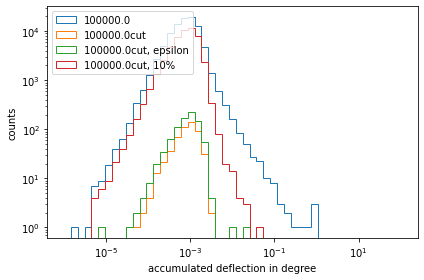

In [36]:
bins = np.logspace(-6, 2, 50)
i = 8
df = df_dict['df_01']
plt.hist(df.deflection, bins=bins, histtype='step', label=E_f[i])
plt.hist(df.deflection[df.E_f == E_f[i]], bins=bins, histtype='step', label=str(E_f[i]) + 'cut')

epsilon = 0.5 # 500 MeV
ma = 1.1
mi = 0.9
plt.hist(df.deflection[(df.E_f < E_f[i] + epsilon) & (df.E_f > E_f[i] - epsilon)], bins=bins, histtype='step', label=str(E_f[i]) + 'cut, epsilon')
plt.hist(df.deflection[(df.E_f < E_f[i] * ma) & (df.E_f > E_f[i] * mi)], bins=bins, histtype='step', label=str(E_f[i]) + 'cut, 10%')


print(np.median(df.deflection), np.median(df.deflection[df.E_f == E_f[i]]))
print(np.median(df.deflection) - np.quantile(df.deflection, 0.025), np.median(df.deflection[df.E_f == E_f[i]]) - np.quantile(df.deflection[df.E_f == E_f[i]], 0.025))
print(np.quantile(df.deflection, 0.975) - np.median(df.deflection),  np.quantile(df.deflection[df.E_f == E_f[i]], 0.975) - np.median(df.deflection))


plt.xscale('log')
plt.yscale('log')
plt.xlabel('accumulated deflection in degree')
plt.ylabel('counts')
plt.legend(loc='upper left')
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '1PeV_deflections_hard_cut_E_min.pdf')

0.0014836943914518503073 0.0016263603563359010761
0.0012403070140893090207 0.0013397974772513606767
0.0039432041254089582537 0.002761474208438448533


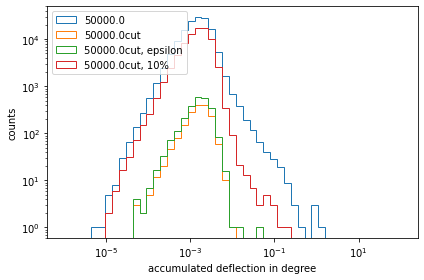

In [37]:
bins = np.logspace(-6, 2, 50)
i = 7
df = df_dict['df_06']
plt.hist(df.deflection, bins=bins, histtype='step', label=E_f[i])
plt.hist(df.deflection[df.E_f == E_f[i]], bins=bins, histtype='step', label=str(E_f[i]) + 'cut')

epsilon = 0.5 # 500 MeV
mi = 0.9
plt.hist(df.deflection[(df.E_f < E_f[i] + epsilon) & (df.E_f > E_f[i] - epsilon)], bins=bins, histtype='step', label=str(E_f[i]) + 'cut, epsilon')
plt.hist(df.deflection[df.E_f > E_f[i] * mi], bins=bins, histtype='step', label=str(E_f[i]) + 'cut, 10%')


print(np.median(df.deflection), np.median(df.deflection[df.E_f == E_f[i]]))
print(np.median(df.deflection) - np.quantile(df.deflection, 0.025), np.median(df.deflection[df.E_f == E_f[i]]) - np.quantile(df.deflection[df.E_f == E_f[i]], 0.025))
print(np.quantile(df.deflection, 0.975) - np.median(df.deflection),  np.quantile(df.deflection[df.E_f == E_f[i]], 0.975) - np.median(df.deflection))

plt.xscale('log')
plt.yscale('log')
plt.xlabel('accumulated deflection in degree')
plt.ylabel('counts')
plt.legend(loc='upper left')
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '1PeV_deflections_hard_cut_E_min.pdf')

In [38]:
mi = 0.9

# E_i = 10 PeV
deflection_median_10P_cut = []
deflection_median_lower_10P_cut = [] 
deflection_median_upper_10P_cut = []
for i,d in enumerate(df_dict_10P):
    df = df_dict_10P[d]
    print(d, df.E_i[0], mode(df.E_f), len(df), len(df[df.E_f == mode(df.E_f)]), len(df[df.E_f == mode(df.E_f)])/len(df), len(df[df.E_f > mode(df.E_f) * mi])/len(df), np.round(1000/(len(df[df.E_f > mode(df.E_f) * mi])/len(df)))) 
    deflection_median_10P_cut.append(np.median(df.deflection[df.E_f == mode(df.E_f)]))
    deflection_median_lower_10P_cut.append(np.median(df.deflection[df.E_f == mode(df.E_f)]) - np.quantile(df.deflection[df.E_f == mode(df.E_f)], 0.025)) # 95% content
    deflection_median_upper_10P_cut.append(np.quantile(df.deflection[df.E_f == mode(df.E_f)], 0.975) - np.median(df.deflection[df.E_f == mode(df.E_f)]))

# E_i = 1 PeV    
deflection_median_1P_cut = []
deflection_median_lower_1P_cut = [] 
deflection_median_upper_1P_cut = []
for d in df_dict:
    df = df_dict[d]
    print(d, df.E_i[0], mode(df.E_f), len(df), len(df[df.E_f == mode(df.E_f)]), len(df[df.E_f == mode(df.E_f)])/len(df), len(df[df.E_f > mode(df.E_f) * mi])/len(df), np.round(1000/(len(df[df.E_f > mode(df.E_f) * mi])/len(df))))
    deflection_median_1P_cut.append(np.median(df.deflection[df.E_f == mode(df.E_f)]))
    deflection_median_lower_1P_cut.append(np.median(df.deflection[df.E_f == mode(df.E_f)]) - np.quantile(df.deflection[df.E_f == mode(df.E_f)], 0.025)) # 95% content
    deflection_median_upper_1P_cut.append(np.quantile(df.deflection[df.E_f == mode(df.E_f)], 0.975) - np.median(df.deflection[df.E_f == mode(df.E_f)]))
    
# E_i = 100 TabNine::eV
deflection_median_100_cut = []
deflection_median_lower_100_cut = [] 
deflection_median_upper_100_cut = []
for d in df_dict_100:
    df = df_dict_100[d]
    print(d, df.E_i[0], mode(df.E_f), len(df), len(df[df.E_f == mode(df.E_f)]), len(df[df.E_f == mode(df.E_f)])/len(df), len(df[df.E_f > mode(df.E_f) * mi])/len(df), np.round(1000/(len(df[df.E_f > mode(df.E_f) * mi])/len(df))))
    deflection_median_100_cut.append(np.median(df.deflection[df.E_f == mode(df.E_f)]))
    deflection_median_lower_100_cut.append(np.median(df.deflection[df.E_f == mode(df.E_f)]) - np.quantile(df.deflection[df.E_f == mode(df.E_f)], 0.025)) # 95% content
    deflection_median_upper_100_cut.append(np.quantile(df.deflection[df.E_f == mode(df.E_f)], 0.975) - np.median(df.deflection[df.E_f == mode(df.E_f)]))

# E_i = 10 TeV    
deflection_median_10_cut = []
deflection_median_lower_10_cut = [] 
deflection_median_upper_10_cut = []
for d in df_dict_10:
    df = df_dict_10[d]
    print(d, df.E_i[0], mode(df.E_f), len(df), len(df[df.E_f == mode(df.E_f)]), len(df[df.E_f == mode(df.E_f)])/len(df), len(df[df.E_f > mode(df.E_f) * mi])/len(df), np.round(1000/(len(df[df.E_f > mode(df.E_f) * mi])/len(df))))
    deflection_median_10_cut.append(np.median(df.deflection[df.E_f == mode(df.E_f)]))
    deflection_median_lower_10_cut.append(np.median(df.deflection[df.E_f == mode(df.E_f)]) - np.quantile(df.deflection[df.E_f == mode(df.E_f)], 0.025)) # 95% content
    deflection_median_upper_10_cut.append(np.quantile(df.deflection[df.E_f == mode(df.E_f)], 0.975) - np.median(df.deflection[df.E_f == mode(df.E_f)]))

df_10 10000000.0 10.0 55000 51019 0.9276181818181818 0.9741636363636363 1027.0
df_09 10000000.0 50.0 55000 44955 0.8173636363636364 0.9267090909090909 1079.0
df_04 10000000.0 100.0 57500 42969 0.7472869565217392 0.8942260869565217 1118.0
df_08 10000000.0 500.0 65000 31606 0.48624615384615383 0.7754769230769231 1290.0
df_03 10000000.0 1000.0 72500 24908 0.34355862068965515 0.7108413793103449 1407.0
df_07 10000000.0 5000.0 85000 9013 0.10603529411764706 0.6042588235294117 1655.0
df_02 10000000.0 10000.0 87500 5022 0.05739428571428572 0.57728 1732.0
df_06 10000000.0 50000.0 142500 1719 0.012063157894736842 0.5519578947368421 1812.0
df_01 10000000.0 100000.0 92500 560 0.006054054054054054 0.5442486486486486 1837.0
df_05 10000000.0 500000.0 92500 100 0.001081081081081081 0.5386918918918919 1856.0
df_11 10000000.0 1000000.0 95000 68 0.0007157894736842105 0.5326842105263158 1877.0
df_12 10000000.0 5000000.0 95000 16 0.00016842105263157895 0.5797473684210527 1725.0
df_10 1000000.0 10.0 55000 5

poly params:  [ 0.02079745 -0.27869264  0.2896827  -0.14734355] , errors:  [0.00123924 0.01444426 0.05059793 0.05152773]
efit params:  [-6.68125871  0.08682842  7.34752874] , errors:  [2.99389352 0.028721   3.1172831 ]
efit params:  [-2.24397921  0.18746197  2.68516419] , errors:  [0.46121628 0.02276031 0.52718041]
efit params:  [-1.19633588  0.27463677  1.50929961] , errors:  [0.20944526 0.02567225 0.2561133 ]
efit params:  [-1.19633588  0.27463677  1.50929961] , errors:  [0.20944526 0.02567225 0.2561133 ]


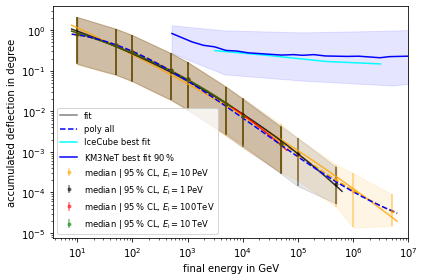

In [48]:
### fit deflection medians
x = np.logspace(0.1, 7, 1000)
# plt.figure(figsize=(12, 10))


# polynom fit
def poly(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# E_i = 10 PeV
params, cov = curve_fit(poly, np.log10(E_f_10P), np.log10(deflection_median_10P_cut))
errors = np.sqrt(np.diag(cov))
print('poly params: ', params, ', errors: ', errors)
x = np.logspace(0.9, 6.8, 1000)
plt.plot(x, np.power(10, poly(np.log10(x), *params)), '--', color='orange', alpha=1) # , label='poly')


# e-fit 
def efit(x, a, b, c):
    return a * np.exp(b * x) + c

# E_i = 10 PeV
params, cov = curve_fit(efit, np.log10(E_f_10P), np.log10(deflection_median_10P_cut))
errors = np.sqrt(np.diag(cov))
print('efit params: ', params, ', errors: ', errors) 
plt.plot(x, np.power(10, efit(np.log10(x), *params)), color='orange', alpha=0.8) # , label='efit')

plt.errorbar(E_f_10P, deflection_median_10P_cut, yerr=(deflection_median_lower_10P_cut, deflection_median_upper_10P_cut), fmt='.', color='orange', alpha=0.5, label=r'median | $95\,$% CL, $E_\mathrm{i} = 10\,$PeV')
plt.fill_between(E_f_10P, np.array(deflection_median_10P_cut)-np.array(deflection_median_lower_10P_cut), np.array(deflection_median_10P_cut) + np.array(deflection_median_upper_10P_cut), alpha=0.1, color='orange')


# E_i = 1 PeV
params, cov = curve_fit(efit, np.log10(E_f), np.log10(deflection_median_1P_cut))
errors = np.sqrt(np.diag(cov))
print('efit params: ', params, ', errors: ', errors) 
x = np.logspace(0.9, 5.8, 1000)
plt.plot(x, np.power(10, efit(np.log10(x), *params)), color='black', alpha=0.8) # , label='efit')

plt.errorbar(E_f, deflection_median_1P_cut, yerr=(deflection_median_lower_1P_cut, deflection_median_upper_1P_cut), fmt='.', color='black', alpha=0.5, label=r'median | $95\,$% CL, $E_\mathrm{i} = 1\,$PeV')
plt.fill_between(E_f, np.array(deflection_median_1P_cut)-np.array(deflection_median_lower_1P_cut), np.array(deflection_median_1P_cut) + np.array(deflection_median_upper_1P_cut), alpha=0.1, color='black')


# E_i = 100 TeV
params, cov = curve_fit(efit, np.log10(E_f_100), np.log10(deflection_median_100_cut))
errors = np.sqrt(np.diag(cov))
print('efit params: ', params, ', errors: ', errors) 
x = np.logspace(0.9, 4.8, 1000)
plt.plot(x, np.power(10, efit(np.log10(x), *params)), color='red', alpha=0.8) #, label='efit')

plt.errorbar(E_f_100, deflection_median_100_cut, yerr=(deflection_median_lower_100_cut, deflection_median_upper_100_cut), fmt='.', color='red', alpha=0.5, label=r'median | $95\,$% CL, $E_\mathrm{i} = 100\,$TeV')
plt.fill_between(E_f_100, np.array(deflection_median_100_cut)-np.array(deflection_median_lower_100_cut), np.array(deflection_median_100_cut) + np.array(deflection_median_upper_100_cut), alpha=0.1, color='red')


# E_i = 10 TeV
params, cov = curve_fit(efit, np.log10(E_f_10), np.log10(deflection_median_10_cut))
errors = np.sqrt(np.diag(cov))
print('efit params: ', params, ', errors: ', errors) 
x = np.logspace(0.9, 3.8, 1000)
plt.plot(x, np.power(10, efit(np.log10(x), *params)), color='green', alpha=0.8) #, label='efit')

plt.errorbar(E_f_10, deflection_median_10_cut, yerr=(deflection_median_lower_10_cut, deflection_median_upper_10_cut), fmt='.', color='green', alpha=0.5, label=r'median | $95\,$% CL, $E_\mathrm{i} = 10\,$TeV')
plt.fill_between(E_f_10, np.array(deflection_median_10_cut)-np.array(deflection_median_lower_10_cut), np.array(deflection_median_10_cut) + np.array(deflection_median_upper_10_cut), alpha=0.1, color='green')

plt.plot(0, 0, '-', color='grey', label='fit')

x = np.logspace(0.9, 6.8, 1000)
plt.plot(x, np.power(10, poly(np.log10(x), 0.02346311, -0.30322558, 0.34082957, -0.17725468)), '--', color='blue', alpha=1, label='poly all')

# IceCube 2021
IceCube_median_error_E = [3154.6222956675642, 31393.67119012529, 318535.5398366218, 3139367.1190125225]
IceCube_median_error_theta = [0.3132923103706559, 0.23583164894478967, 0.1696125188412025, 0.147416292664677]
plt.plot(IceCube_median_error_E, IceCube_median_error_theta, '-', color='cyan', label='IceCube best fit')

# KM3NeT 2016
KM3NeT_median_error_E = [522.4356285756223, 1216.8748116390357, 1943.231716329505, 3103.1536417971624, 
                         4955.437091562044, 7913.355122889535, 12636.864951346342, 50689.50296608002, 
                         83427.93140908847, 121687.48116390369, 194323.17163295028, 315036.3417558579, 
                         779476.9527719838, 1263686.4951346342, 3079814.718585156, 4560541.30436924, 
                         9850144.98486653, 20642110.490612086, 32469485.711770043, 48811773.81527156]
KM3NeT_median_error_theta = [0.827576632070297, 0.5123763092955053, 0.42403066039938264, 0.38818709714958904, 
                             0.31722679466012654, 0.305443935560202, 0.2761187447596839, 0.24338923735390608, 
                             0.24960901930441665, 0.2403377094590886, 0.24960901930441665, 0.2314107669226327, 
                             0.22564445080444856, 0.22850942083969703, 0.20919338394904638, 0.22281540074690914,
                             0.22850942083969703, 0.23434895091387908, 0.22850942083969703, 0.24647950999050272]
plt.plot(KM3NeT_median_error_E, KM3NeT_median_error_theta, '-', color='blue', label='KM3NeT best fit $90\,$%')
x = [514.606668672977, 4665.0087107025565,  123538.77161286505, 5224356.285756218, 1e7]
y_low = [0.27265686591460175, 0.08120617245807966, 0.05703801243761694, 0.04321320106658356, 0.0478]
y_up = [1.3199210201931573, 0.9874623548354361, 0.8814658257473126, 0.9750819022171437, 1.01]
plt.fill_between(x, y_low, y_up, alpha=0.1, color='blue')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('final energy in GeV')
plt.ylabel('accumulated deflection in degree')
plt.xlim(right=1e7)
plt.legend(fontsize='small', loc='lower left')
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'fit_median_defl_cut.pdf')

# 10% cut of E_min

In [53]:
mi = 0.9

# E_i = 10 PeV
deflection_median_10P_cut_10 = []
deflection_median_lower_10P_cut_10 = [] 
deflection_median_upper_10P_cut_10 = []
for i,d in enumerate(df_dict_10P):
    df = df_dict_10P[d]
    print(d, df.E_i[0], mode(df.E_f), len(df), len(df[df.E_f > mode(df.E_f) * mi]), len(df[df.E_f == mode(df.E_f)])/len(df), len(df[df.E_f > mode(df.E_f) * mi])/len(df), np.round(1000/(len(df[df.E_f > mode(df.E_f) * mi])/len(df)))) 
    deflection_median_10P_cut_10.append(np.median(df.deflection[df.E_f > mode(df.E_f) * mi]))
    deflection_median_lower_10P_cut_10.append(np.median(df.deflection[df.E_f > mode(df.E_f) * mi]) - np.quantile(df.deflection[df.E_f > mode(df.E_f) * mi], 0.025)) # 95% content
    deflection_median_upper_10P_cut_10.append(np.quantile(df.deflection[df.E_f > mode(df.E_f) * mi], 0.975) - np.median(df.deflection[df.E_f > mode(df.E_f) * mi]))

# E_i = 1 PeV    
deflection_median_1P_cut_10 = []
deflection_median_lower_1P_cut_10 = [] 
deflection_median_upper_1P_cut_10 = []
for d in df_dict:
    df = df_dict[d]
    print(d, df.E_i[0], mode(df.E_f), len(df), len(df[df.E_f > mode(df.E_f) * mi]), len(df[df.E_f == mode(df.E_f)])/len(df), len(df[df.E_f > mode(df.E_f) * mi])/len(df), np.round(1000/(len(df[df.E_f > mode(df.E_f) * mi])/len(df))))
    deflection_median_1P_cut_10.append(np.median(df.deflection[df.E_f > mode(df.E_f) * mi]))
    deflection_median_lower_1P_cut_10.append(np.median(df.deflection[df.E_f > mode(df.E_f) * mi]) - np.quantile(df.deflection[df.E_f > mode(df.E_f) * mi], 0.025)) # 95% content
    deflection_median_upper_1P_cut_10.append(np.quantile(df.deflection[df.E_f > mode(df.E_f) * mi], 0.975) - np.median(df.deflection[df.E_f > mode(df.E_f) * mi]))
    
# E_i = 100 TabNine::eV
deflection_median_100_cut_10 = []
deflection_median_lower_100_cut_10 = [] 
deflection_median_upper_100_cut_10 = []
for d in df_dict_100:
    df = df_dict_100[d]
    print(d, df.E_i[0], mode(df.E_f), len(df), len(df[df.E_f > mode(df.E_f) * mi]), len(df[df.E_f == mode(df.E_f)])/len(df), len(df[df.E_f > mode(df.E_f) * mi])/len(df), np.round(1000/(len(df[df.E_f > mode(df.E_f) * mi])/len(df))))
    deflection_median_100_cut_10.append(np.median(df.deflection[df.E_f > mode(df.E_f) * mi]))
    deflection_median_lower_100_cut_10.append(np.median(df.deflection[df.E_f > mode(df.E_f) * mi]) - np.quantile(df.deflection[df.E_f > mode(df.E_f) * mi], 0.025)) # 95% content
    deflection_median_upper_100_cut_10.append(np.quantile(df.deflection[df.E_f > mode(df.E_f) * mi], 0.975) - np.median(df.deflection[df.E_f > mode(df.E_f) * mi]))

# E_i = 10 TeV    
deflection_median_10_cut_10 = []
deflection_median_lower_10_cut_10 = [] 
deflection_median_upper_10_cut_10 = []
for d in df_dict_10:
    df = df_dict_10[d]
    print(d, df.E_i[0], mode(df.E_f), len(df), len(df[df.E_f > mode(df.E_f) * mi]), len(df[df.E_f == mode(df.E_f)])/len(df), len(df[df.E_f > mode(df.E_f) * mi])/len(df), np.round(1000/(len(df[df.E_f > mode(df.E_f) * mi])/len(df))))
    deflection_median_10_cut_10.append(np.median(df.deflection[df.E_f > mode(df.E_f) * mi]))
    deflection_median_lower_10_cut_10.append(np.median(df.deflection[df.E_f > mode(df.E_f) * mi]) - np.quantile(df.deflection[df.E_f > mode(df.E_f) * mi], 0.025)) # 95% content
    deflection_median_upper_10_cut_10.append(np.quantile(df.deflection[df.E_f > mode(df.E_f) * mi], 0.975) - np.median(df.deflection[df.E_f > mode(df.E_f) * mi]))

df_10 10000000.0 10.0 55000 53579 0.9276181818181818 0.9741636363636363 1027.0
df_09 10000000.0 50.0 55000 50969 0.8173636363636364 0.9267090909090909 1079.0
df_04 10000000.0 100.0 57500 51418 0.7472869565217392 0.8942260869565217 1118.0
df_08 10000000.0 500.0 65000 50406 0.48624615384615383 0.7754769230769231 1290.0
df_03 10000000.0 1000.0 72500 51536 0.34355862068965515 0.7108413793103449 1407.0
df_07 10000000.0 5000.0 85000 51362 0.10603529411764706 0.6042588235294117 1655.0
df_02 10000000.0 10000.0 87500 50512 0.05739428571428572 0.57728 1732.0
df_06 10000000.0 50000.0 142500 78654 0.012063157894736842 0.5519578947368421 1812.0
df_01 10000000.0 100000.0 92500 50343 0.006054054054054054 0.5442486486486486 1837.0
df_05 10000000.0 500000.0 92500 49829 0.001081081081081081 0.5386918918918919 1856.0
df_11 10000000.0 1000000.0 95000 50605 0.0007157894736842105 0.5326842105263158 1877.0
df_12 10000000.0 5000000.0 95000 55076 0.00016842105263157895 0.5797473684210527 1725.0
df_10 1000000.0

poly params:  [ 0.02407291 -0.31206222  0.37943753 -0.21557717] , errors:  [0.00138644 0.01616002 0.05660823 0.05764848]
efit params:  [-8.06133608  0.07558143  8.76794475] , errors:  [4.52780635 0.03250281 4.67017266]
efit params:  [-2.45467534  0.17835169  2.92008959] , errors:  [0.5804576  0.02545998 0.65568826]
efit params:  [-1.23645258  0.27121058  1.55863661] , errors:  [0.23212289 0.0273597  0.28256125]
efit params:  [-1.23645258  0.27121058  1.55863661] , errors:  [0.23212289 0.0273597  0.28256125]


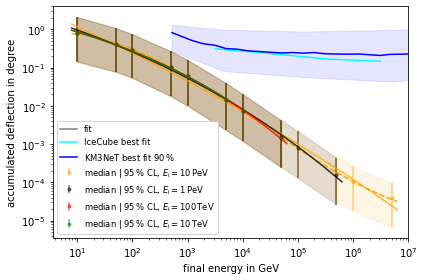

In [60]:
### fit deflection medians
x = np.logspace(0.1, 7, 1000)
# plt.figure(figsize=(12, 10))


# polynom fit
def poly(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# E_i = 10 PeV
params, cov = curve_fit(poly, np.log10(E_f_10P), np.log10(deflection_median_10P_cut_10))
errors = np.sqrt(np.diag(cov))
print('poly params: ', params, ', errors: ', errors)
x = np.logspace(0.9, 6.8, 1000)
plt.plot(x, np.power(10, poly(np.log10(x), *params)), '--', color='orange', alpha=1) # , label='poly')


# e-fit 
def efit(x, a, b, c):
    return a * np.exp(b * x) + c

# E_i = 10 PeV
params, cov = curve_fit(efit, np.log10(E_f_10P), np.log10(deflection_median_10P_cut_10))
errors = np.sqrt(np.diag(cov))
print('efit params: ', params, ', errors: ', errors) 
plt.plot(x, np.power(10, efit(np.log10(x), *params)), color='orange', alpha=0.8) # , label='efit')

plt.errorbar(E_f_10P, deflection_median_10P_cut_10, yerr=(deflection_median_lower_10P_cut_10, deflection_median_upper_10P_cut_10), fmt='.', color='orange', alpha=0.5, label=r'median | $95\,$% CL, $E_\mathrm{i} = 10\,$PeV')
plt.fill_between(E_f_10P, np.array(deflection_median_10P_cut_10)-np.array(deflection_median_lower_10P_cut_10), np.array(deflection_median_10P_cut_10) + np.array(deflection_median_upper_10P_cut_10), alpha=0.1, color='orange')


# E_i = 1 PeV
params, cov = curve_fit(efit, np.log10(E_f), np.log10(deflection_median_1P_cut_10))
errors = np.sqrt(np.diag(cov))
print('efit params: ', params, ', errors: ', errors) 
x = np.logspace(0.9, 5.8, 1000)
plt.plot(x, np.power(10, efit(np.log10(x), *params)), color='black', alpha=0.8) # , label='efit')

plt.errorbar(E_f, deflection_median_1P_cut_10, yerr=(deflection_median_lower_1P_cut_10, deflection_median_upper_1P_cut_10), fmt='.', color='black', alpha=0.5, label=r'median | $95\,$% CL, $E_\mathrm{i} = 1\,$PeV')
plt.fill_between(E_f, np.array(deflection_median_1P_cut_10)-np.array(deflection_median_lower_1P_cut_10), np.array(deflection_median_1P_cut_10) + np.array(deflection_median_upper_1P_cut_10), alpha=0.1, color='black')


# E_i = 100 TeV
params, cov = curve_fit(efit, np.log10(E_f_100), np.log10(deflection_median_100_cut_10))
errors = np.sqrt(np.diag(cov))
print('efit params: ', params, ', errors: ', errors) 
x = np.logspace(0.9, 4.8, 1000)
plt.plot(x, np.power(10, efit(np.log10(x), *params)), color='red', alpha=0.8) #, label='efit')

plt.errorbar(E_f_100, deflection_median_100_cut_10, yerr=(deflection_median_lower_100_cut_10, deflection_median_upper_100_cut_10), fmt='.', color='red', alpha=0.5, label=r'median | $95\,$% CL, $E_\mathrm{i} = 100\,$TeV')
plt.fill_between(E_f_100, np.array(deflection_median_100_cut_10)-np.array(deflection_median_lower_100_cut_10), np.array(deflection_median_100_cut_10) + np.array(deflection_median_upper_100_cut_10), alpha=0.1, color='red')


# E_i = 10 TeV
params, cov = curve_fit(efit, np.log10(E_f_10), np.log10(deflection_median_10_cut_10))
errors = np.sqrt(np.diag(cov))
print('efit params: ', params, ', errors: ', errors) 
x = np.logspace(0.9, 3.8, 1000)
plt.plot(x, np.power(10, efit(np.log10(x), *params)), color='green', alpha=0.8) #, label='efit')

plt.errorbar(E_f_10, deflection_median_10_cut_10, yerr=(deflection_median_lower_10_cut_10, deflection_median_upper_10_cut_10), fmt='.', color='green', alpha=0.5, label=r'median | $95\,$% CL, $E_\mathrm{i} = 10\,$TeV')
plt.fill_between(E_f_10, np.array(deflection_median_10_cut_10)-np.array(deflection_median_lower_10_cut_10), np.array(deflection_median_10_cut_10) + np.array(deflection_median_upper_10_cut_10), alpha=0.1, color='green')

plt.plot(0, 0, '-', color='grey', label='fit')

# plot fit of all events
# x = np.logspace(0.9, 6.8, 1000)
# plt.plot(x, np.power(10, poly(np.log10(x), 0.02346311, -0.30322558, 0.34082957, -0.17725468)), '--', color='blue', alpha=1, label='poly all')

# IceCube 2021, https://arxiv.org/abs/2103.16931
IceCube_median_error_E = [3154.6222956675642, 31393.67119012529, 318535.5398366218, 3139367.1190125225]
IceCube_median_error_theta = [0.3132923103706559, 0.23583164894478967, 0.1696125188412025, 0.147416292664677]
plt.plot(IceCube_median_error_E, IceCube_median_error_theta, '-', color='cyan', label='IceCube best fit')

# KM3NeT 2016, https://arxiv.org/abs/1601.07459
KM3NeT_median_error_E = [522.4356285756223, 1216.8748116390357, 1943.231716329505, 3103.1536417971624, 
                         4955.437091562044, 7913.355122889535, 12636.864951346342, 50689.50296608002, 
                         83427.93140908847, 121687.48116390369, 194323.17163295028, 315036.3417558579, 
                         779476.9527719838, 1263686.4951346342, 3079814.718585156, 4560541.30436924, 
                         9850144.98486653, 20642110.490612086, 32469485.711770043, 48811773.81527156]
KM3NeT_median_error_theta = [0.827576632070297, 0.5123763092955053, 0.42403066039938264, 0.38818709714958904, 
                             0.31722679466012654, 0.305443935560202, 0.2761187447596839, 0.24338923735390608, 
                             0.24960901930441665, 0.2403377094590886, 0.24960901930441665, 0.2314107669226327, 
                             0.22564445080444856, 0.22850942083969703, 0.20919338394904638, 0.22281540074690914,
                             0.22850942083969703, 0.23434895091387908, 0.22850942083969703, 0.24647950999050272]
plt.plot(KM3NeT_median_error_E, KM3NeT_median_error_theta, '-', color='blue', label='KM3NeT best fit $90\,$%')
x = [514.606668672977, 4665.0087107025565,  123538.77161286505, 5224356.285756218, 1e7]
y_low = [0.27265686591460175, 0.08120617245807966, 0.05703801243761694, 0.04321320106658356, 0.0478]
y_up = [1.3199210201931573, 0.9874623548354361, 0.8814658257473126, 0.9750819022171437, 1.01]
plt.fill_between(x, y_low, y_up, alpha=0.1, color='blue')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('final energy in GeV')
plt.ylabel('accumulated deflection in degree')
plt.xlim(right=1e7)
plt.legend(fontsize='small', loc='lower left')
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'fit_median_defl_cut_10percent.pdf')

# compare poly fit of: all / hard cut on E_min / 10% cut on E_min

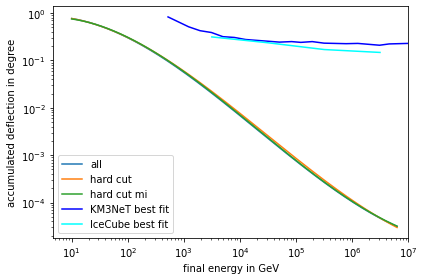

In [59]:
x = np.logspace(1, 6.8, 1000)
plt.plot(x, np.power(10, poly(np.log10(x), 0.02346311, -0.30322558, 0.34082957, -0.17725468)), label='all')
plt.plot(x, np.power(10, poly(np.log10(x), 0.02079745, -0.27869264,  0.2896827,  -0.14734355)), label='hard cut')
plt.plot(x, np.power(10, poly(np.log10(x),  0.02407291, -0.31206222 , 0.37943753, -0.21557717)), label='hard cut mi')
plt.plot(KM3NeT_median_error_E, KM3NeT_median_error_theta, '-', color='blue', label='KM3NeT best fit')
plt.plot(IceCube_median_error_E, IceCube_median_error_theta, '-', color='cyan', label='IceCube best fit')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('final energy in GeV')
plt.ylabel('accumulated deflection in degree')
plt.xlim(right=1e7)
plt.legend()
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'compare_fits_different_cuts_E_min.pdf')